#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


#### Load the dataset

In [3]:
df  =  pd.read_csv("C:\\Users\\hp.MUKESH-LF4B6N6\\OneDrive\\Documents\\Desktop\\Twitter-project\\twitter_new9.csv",  encoding="latin-1")

In [4]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.tail(5)

,target,ids,date,flag,user,text
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048575 non-null  int64 
 1   ids     1048575 non-null  int64 
 2   date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   user    1048575 non-null  object
 5   text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [7]:
df.shape

(1048575, 6)

In [8]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
df.describe()

,target,ids
count,1.048575e+06,1.048575e+06
mean,9.482431e-01,1.976166e+09
std,1.701120e+00,2.300580e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990869e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [10]:
df['target'].value_counts()

target
0    799999
4    248576
Name: count, dtype: int64

In [11]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [12]:
print(df['text'].iloc[1], "\n")
print(df['text'].iloc[2], "\n")
print(df['text'].iloc[3], "\n")
print(df['text'].iloc[4], "\n")
print(df['text'].iloc[5], "\n")

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

@Kwesidei not the whole crew  

Need a hug  



##### data preprocessing

In [13]:
def data_preprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+| wwww \S+https\S+", '', text, flags= re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ". join(filtered_text)


In [14]:
df.text =df['text'].apply(data_preprocessing)

In [15]:
df.text

0          upset cant update facebook texting might cry r...
1          kenichan dived many times ball managed save 50...
2                           whole body feels itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1048570                            grandma making dinenr mum
1048571        midmorning snack time bowl cheese noodles yum
1048572    shadela say like terminiator movies comes like...
1048573                  destinyhope92 im great thaanks wbuu
1048574                           cant wait til date weekend
Name: text, Length: 1048575, dtype: object

In [16]:
df  = df.drop_duplicates('text')

In [17]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
df['text'] = df['text'].apply(lambda x: stemming(x))

In [19]:
df['text'] 

0          upset cant update facebook texting might cry r...
1          kenichan dived many times ball managed save 50...
2                           whole body feels itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1048570                            grandma making dinenr mum
1048571        midmorning snack time bowl cheese noodles yum
1048572    shadela say like terminiator movies comes like...
1048573                  destinyhope92 im great thaanks wbuu
1048574                           cant wait til date weekend
Name: text, Length: 1017312, dtype: object

In [20]:
print(df['text'].iloc[1], "\n")
print(df['text'].iloc[2], "\n")
print(df['text'].iloc[3], "\n")
print(df['text'].iloc[4], "\n")
print(df['text'].iloc[5], "\n")

kenichan dived many times ball managed save 50 rest go bounds 

whole body feels itchy like fire 

nationwideclass behaving im mad cant see 

kwesidei whole crew 

need hug 



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017312 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1017312 non-null  int64 
 1   ids     1017312 non-null  int64 
 2   date    1017312 non-null  object
 3   flag    1017312 non-null  object
 4   user    1017312 non-null  object
 5   text    1017312 non-null  object
dtypes: int64(2), object(4)
memory usage: 54.3+ MB


In [22]:
def polarty(text):
    return TextBlob(text).sentiment.polarity

In [23]:
df['polarity'] = df['text'].apply(polarty)

In [24]:
df['polarity']

0          0.000
1          0.500
2          0.200
3         -0.625
4          0.200
           ...  
1048570    0.000
1048571    0.000
1048572    0.000
1048573    0.800
1048574    0.000
Name: polarity, Length: 1017312, dtype: float64

In [25]:
df.head(5)

,target,ids,date,flag,user,text,polarity
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...,0.500
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see,-0.625
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew,0.200


##### 1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)


In [26]:
def sentiment(target):
    if target <0:
        return "Nagative" 
    elif target ==0:
        return "Neutral"
    elif target>0:
        return "Positive"

In [27]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [28]:
df['sentiment']

0           Neutral
1          Positive
2          Positive
3          Nagative
4          Positive
             ...   
1048570     Neutral
1048571     Neutral
1048572     Neutral
1048573    Positive
1048574     Neutral
Name: sentiment, Length: 1017312, dtype: object

In [29]:
df.head(5)

,target,ids,date,flag,user,text,polarity,sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000,Neutral
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...,0.500,Positive
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200,Positive
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see,-0.625,Nagative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew,0.200,Positive


<Axes: xlabel='sentiment', ylabel='count'>

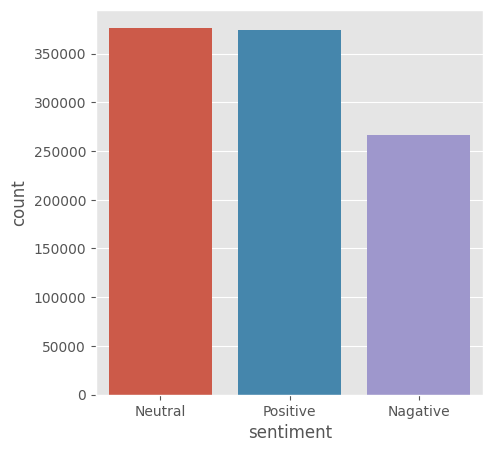

In [30]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x= 'sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

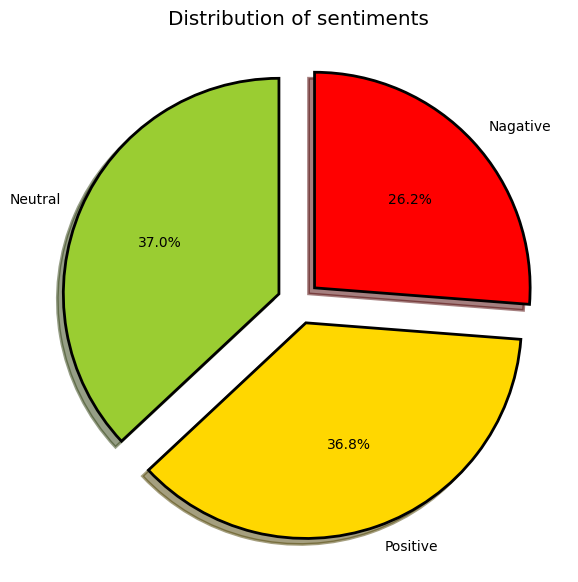

In [31]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

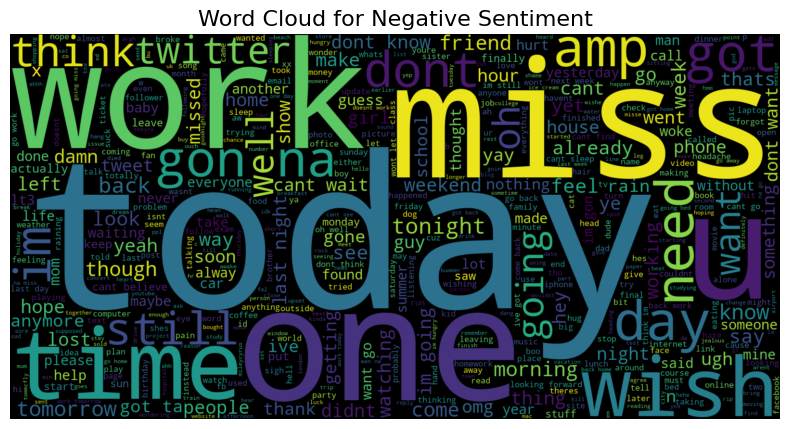

No data available for Word Cloud for Neutral Sentiment
No data available for Word Cloud for Positive Sentiment


In [32]:
# Create separate DataFrames for each sentiment category
negative_tweets = df[df['polarity'] == 0]
neutral_tweets = df[df['polarity'] == 2]
positive_tweets = df[df['polarity'] == 4]

# Function to generate and display word clouds
def generate_wordcloud(sentiment_tweets, title):
    if not sentiment_tweets.empty:  # Check if the DataFrame is not empty
        text = ' '.join(sentiment_tweets['text'])
        wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=16)
        plt.show()
    else:
        print(f"No data available for {title}")

# Generate word clouds for each sentiment category
generate_wordcloud(negative_tweets, 'Word Cloud for Negative Sentiment')
generate_wordcloud(neutral_tweets, 'Word Cloud for Neutral Sentiment')
generate_wordcloud(positive_tweets, 'Word Cloud for Positive Sentiment')


##### 2. ids: The id of the tweet .


In [33]:
# Extract unique tweet IDs
unique_tweet_ids = df['ids'].unique()

# Print the first 10 unique tweet IDs for demonstration
for tweet_id in unique_tweet_ids[:10]:
    print(tweet_id)

1467810672
1467810917
1467811184
1467811193
1467811372
1467811592
1467811594
1467811795
1467812025
1467812416


#### Extract temporal features from the "date" field

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()  # Extract day of the week
df['time_of_day'] = df['date'].dt.hour  # Extract time of day
df['month'] = df['date'].dt.month_name()  # Extract month

In [35]:
df.head()

,target,ids,date,flag,user,text,polarity,sentiment,day_of_week,time_of_day,month
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000,Neutral,Monday,22,April
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...,0.500,Positive,Monday,22,April
2,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200,Positive,Monday,22,April
3,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,nationwideclass behaving im mad cant see,-0.625,Nagative,Monday,22,April
4,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,kwesidei whole crew,0.200,Positive,Monday,22,April


#### 3- Process the "flag" field to create a binary feature

In [36]:
df['has_query'] = df['flag'] != 'NO_QUERY'

In [37]:
df.head()

,target,ids,date,flag,user,text,polarity,sentiment,day_of_week,time_of_day,month,has_query
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000,Neutral,Monday,22,April,False
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...,0.500,Positive,Monday,22,April,False
2,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200,Positive,Monday,22,April,False
3,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,nationwideclass behaving im mad cant see,-0.625,Nagative,Monday,22,April,False
4,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,kwesidei whole crew,0.200,Positive,Monday,22,April,False


In [38]:
# Assuming 'user' is the column containing Twitter usernames and 'text' is the text of the tweet
user_sentiments = []

In [39]:
# Analyze sentiment for each user
for user, tweets in df.groupby('user')['text']:
    user_sentiment = TextBlob(" ".join(tweets))
    user_sentiments.append((user, user_sentiment.sentiment.polarity))

In [40]:
# Create a DataFrame to store user-level sentiments
user_sentiment_df = pd.DataFrame(user_sentiments, columns=['User', 'Sentiment Polarity'])

In [41]:
user_sentiment_df

,User,Sentiment Polarity
0,000catnap000,-0.200000
1,000yea000,0.000000
2,001BabyGirl,0.000000
3,006jazzy,0.136364
4,007LouiseOB,0.000000
...,...,...
498348,zzzoeface,0.000000
498349,zzztar,0.000000
498350,zzzum,0.800000
498351,zzzyourdreamzzz,0.000000


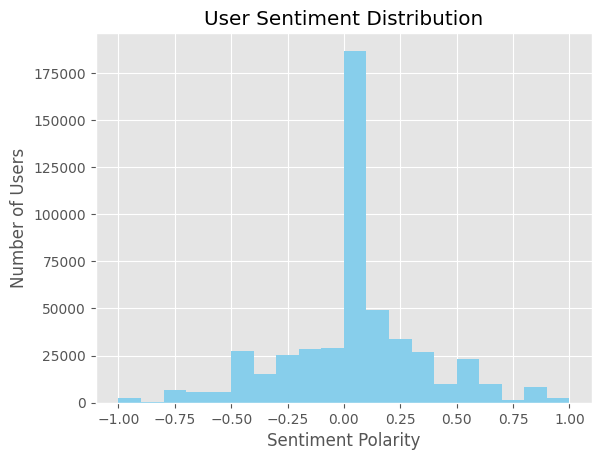

In [42]:
# You can now analyze user-level sentiments using user_sentiment_df
# For example, you can plot a histogram of user sentiments
plt.hist(user_sentiment_df['Sentiment Polarity'], bins=20, color='skyblue')
plt.title('User Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Users')
plt.show()

# You can also sort and filter users based on their sentiment polarity
positive_users = user_sentiment_df[user_sentiment_df['Sentiment Polarity'] > 0]
negative_users = user_sentiment_df[user_sentiment_df['Sentiment Polarity'] < 0]

In [43]:
# Tokenize and preprocess the text data
stop_words = set(stopwords.words('english'))
df['text'] =  df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [44]:
df['text']

0          upset cant update facebook texting might cry r...
1          kenichan dived many times ball managed save 50...
2                           whole body feels itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1048570                            grandma making dinenr mum
1048571        midmorning snack time bowl cheese noodles yum
1048572    shadela say like terminiator movies comes like...
1048573                  destinyhope92 im great thaanks wbuu
1048574                           cant wait til date weekend
Name: text, Length: 1017312, dtype: object

##### Feature Extraction:

In [45]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])

In [46]:
feature_names = vect.get_feature_names_out()
print("Number of feature: {}\n", format(len(feature_names)))
print("First 20 feature:\n{}". format(feature_names[:20]))

Number of feature: {}
 4135618
First 20 feature:
['00' '00 10' '00 draw' '00 exception' '00 followers' '00 good'
 '00 graduated' '00 hurt' '00 im' '00 killing' '00 kiss' '00 lightning'
 '00 oh' '00 punching' '00 reach' '00 result' '00 riley' '00 s2' '00 sad'
 '00 screwdriver']


##### Split the data into training and testing sets

In [47]:
x = df['text'] 
y = df['sentiment']
x = vect.transform(x)

In [48]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [49]:
print("Size of x_train", (x_train.shape))
print("Size of y_train", (x_train.shape))
print("Size of x_test", (y_test.shape))
print("Size of y_test", (y_test.shape))

Size of x_train (813849, 4135618)
Size of y_train (813849, 4135618)
Size of x_test (203463,)
Size of y_test (203463,)


###  classification model 

##### Logistic Regression

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.21%


In [51]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[52006   435   888]
 [  568 74277   554]
 [  807   400 73528]]


              precision    recall  f1-score   support

    Nagative       0.97      0.98      0.97     53329
     Neutral       0.99      0.99      0.99     75399
    Positive       0.98      0.98      0.98     74735

    accuracy                           0.98    203463
   macro avg       0.98      0.98      0.98    203463
weighted avg       0.98      0.98      0.98    203463



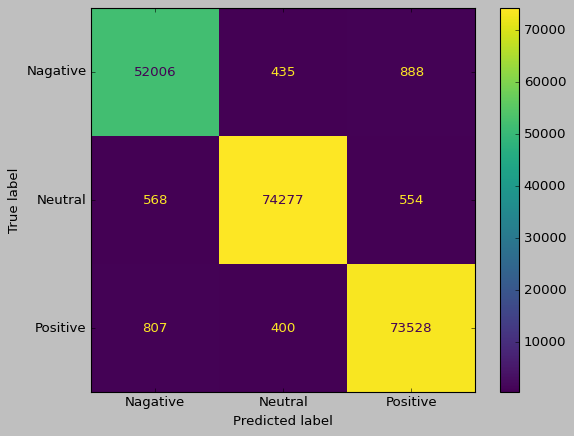

In [52]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= logreg.classes_)
disp.plot()

In [53]:
from sklearn.model_selection import GridSearchCV


In [54]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [55]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [56]:
y_pred = grid.predict(x_test)

In [57]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.56%


In [58]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[52330   285   714]
 [  488 74448   463]
 [  724   262 73749]]


              precision    recall  f1-score   support

    Nagative       0.98      0.98      0.98     53329
     Neutral       0.99      0.99      0.99     75399
    Positive       0.98      0.99      0.99     74735

    accuracy                           0.99    203463
   macro avg       0.98      0.99      0.98    203463
weighted avg       0.99      0.99      0.99    203463



In [59]:
from sklearn.svm import LinearSVC

In [60]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [61]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 98.34%


In [62]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[52339   181   809]
 [  818 73946   635]
 [  744   183 73808]]


              precision    recall  f1-score   support

    Nagative       0.97      0.98      0.98     53329
     Neutral       1.00      0.98      0.99     75399
    Positive       0.98      0.99      0.98     74735

    accuracy                           0.98    203463
   macro avg       0.98      0.98      0.98    203463
weighted avg       0.98      0.98      0.98    203463



In [63]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [64]:
print("Best parameter:", grid.best_params_)


Best parameter: {'C': 1}


In [65]:
y_pred = grid.predict(x_test)

In [66]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 98.34%


In [67]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[52339   181   809]
 [  818 73946   635]
 [  744   183 73808]]


              precision    recall  f1-score   support

    Nagative       0.97      0.98      0.98     53329
     Neutral       1.00      0.98      0.99     75399
    Positive       0.98      0.99      0.98     74735

    accuracy                           0.98    203463
   macro avg       0.98      0.98      0.98    203463
weighted avg       0.98      0.98      0.98    203463



#####  Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)
nb_predictions = nb_classifier.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

Naive Bayes Accuracy: 0.8607019458083288
